<a href="https://colab.research.google.com/github/dagapurva3/Plant-disease-detection/blob/main/caecnn_peach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
encoder = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),
        layers.Conv2D(64, kernel_size=3, strides=1, padding="same",activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(32, kernel_size=3, strides=1,padding="same",activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(3, kernel_size=3, strides=1, padding="same",activation = 'relu'),
        layers.BatchNormalization(),
    ],
    name="encoder",
)
encoder.summary()

In [ ]:
decoder = keras.Sequential(
    [
     keras.Input(shape=(64,64,3)),
     layers.Conv2D(64, kernel_size=3, strides=1, padding="same",activation = 'relu'),
      layers.BatchNormalization(),
      layers.UpSampling2D(2),
      layers.Conv2D(128, kernel_size=3, strides=1, padding="same",activation = 'relu'),
     layers.BatchNormalization(),
      layers.UpSampling2D(2),
      layers.Conv2D(128, kernel_size=3, strides=1, padding="same",activation = 'relu'),
     layers.BatchNormalization(),
      layers.UpSampling2D(1),
      layers.Conv2D(3, kernel_size=3, strides=1, padding="same",activation = 'relu'),
     layers.BatchNormalization(),
    ],
    name = "decoder",
)
decoder.summary()


In [ ]:
x = keras.Input(shape=(256,256,3))
y = encoder(x)
z = decoder(y)
autoencoder = Model(inputs = x, outputs = z)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


In [ ]:
len(t_images)
t_images = np.array(t_images)
t_images.shape

In [ ]:
X_train = t_images[:900]
X_test = t_images[900:]

In [ ]:
!wget "https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded"

--2021-11-20 16:43:55--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd [following]
--2021-11-20 16:43:56--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.101.0
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.101.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949267727 (905M) [application

In [ ]:
!unzip "/content/file_downloaded"

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SeparableConv2D, MaxPooling2D, Lambda
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, add, concatenate
from tensorflow.keras.layers import LeakyReLU, Activation, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
print("hi")

hi


In [ ]:


data_dir = pathlib.Path('/content/dataset_full')
print(type(data_dir))
print(data_dir)
image_count = len(list(data_dir.glob('*/*.JPG')))
print(image_count)

<class 'pathlib.PosixPath'>
/content/dataset_full
3295


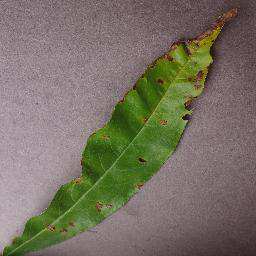

In [ ]:

disea = list(data_dir.glob('Peach___Bacterial_spot/*'))
PIL.Image.open(str(disea[0]))

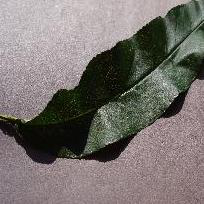

In [ ]:
healthy = list(data_dir.glob('Peach___healthy/*'))
PIL.Image.open(str(healthy[0]))

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3295 files belonging to 2 classes.
Using 2636 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3295 files belonging to 2 classes.
Using 659 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Peach___Bacterial_spot', 'Peach___healthy']


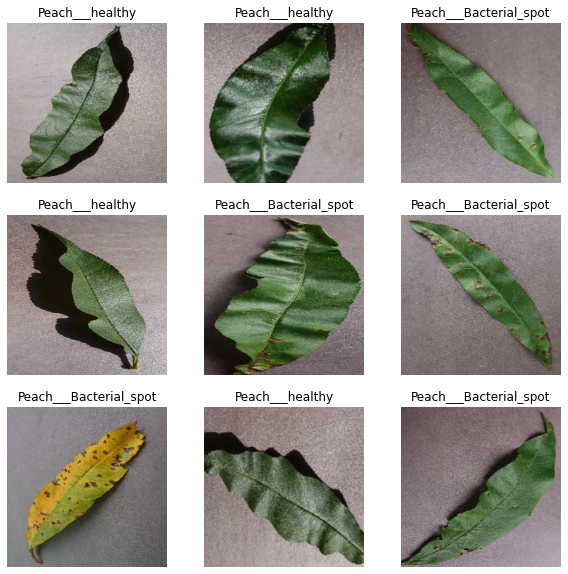

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [ ]:
num_classes = 2

In [ ]:


cae = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),
        layers.Conv2D(16, kernel_size=3, strides=1, padding="same", activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same",activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same", activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same", activation = 'relu'),

        layers.UpSampling2D(2),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same", activation = 'relu'),
        layers.UpSampling2D(2),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same", activation = 'relu'),
        layers.UpSampling2D(2),
        layers.Conv2D(3, kernel_size=3, strides=1, padding="same", activation = 'relu'),

    ],
    name="cae",
)
cae.summary()

Model: "cae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0       

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 100

hybrid = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),
        layers.Conv2D(16, kernel_size=3, strides=1, padding="same", activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same",activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same", activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(8, kernel_size=3, strides=1, padding="same", activation = 'relu'),

        layers.Conv2D(6, kernel_size=3, strides=1, padding="valid", activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(16, kernel_size=3, strides=1, padding="valid",activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(16, kernel_size=3, strides=1, padding="valid", activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid'),



    ],
    name="hybrid",
)
hybrid.summary()

Model: "hybrid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 8)        0    

In [ ]:
hybrid.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hybrid.summary()

Model: "hybrid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 8)        0    

In [ ]:
epochs=20
history = hybrid.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 37s 76ms/step - loss: 0.5448 - accuracy: 0.7546 - val_loss: 0.3122 - val_accuracy: 0.8589
Epoch 2/20
83/83 [==============================] - 5s 57ms/step - loss: 0.2187 - accuracy: 0.9002 - val_loss: 0.1287 - val_accuracy: 0.9560
Epoch 3/20
83/83 [==============================] - 5s 56ms/step - loss: 0.1058 - accuracy: 0.9590 - val_loss: 0.0839 - val_accuracy: 0.9697
Epoch 4/20
83/83 [==============================] - 5s 56ms/step - loss: 0.1228 - accuracy: 0.9526 - val_loss: 0.1124 - val_accuracy: 0.9499
Epoch 5/20
83/83 [==============================] - 5s 56ms/step - loss: 0.0694 - accuracy: 0.9727 - val_loss: 0.0842 - val_accuracy: 0.9697
Epoch 6/20
83/83 [==============================] - 5s 56ms/step - loss: 0.0645 - accuracy: 0.9769 - val_loss: 0.0780 - val_accuracy: 0.9666
Epoch 7/20
83/83 [==============================] - 5s 55ms/step - loss: 0.0781 - accuracy: 0.9723 - val_loss: 0.0672 - val_accuracy: 0.9712
Epoch 8/20
83/83 [=====

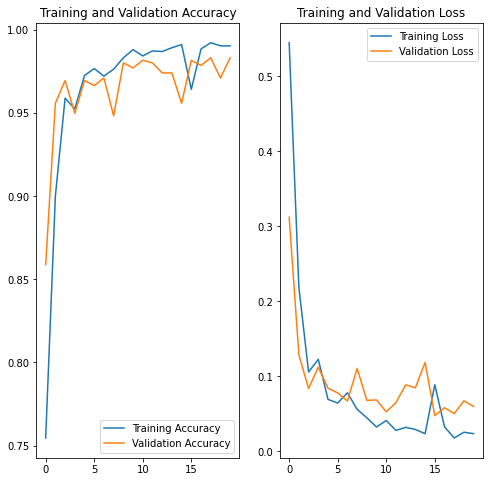

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = tf.keras.utils.load_img(
    '/content/dataset_full/Peach___Bacterial_spot/image (10).JPG', target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = hybrid.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Peach___Bacterial_spot with a 100.00 percent confidence.
